In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd 
import rasterio
import os
import json
from IPython.display import display, Markdown,HTML
import requests
import matplotlib.pyplot as plt

# Kenia Dashboard

List of indicators:
* Wildlife Numbers
* Livestock Numbers
* Livestock Numbers
* Livestock Numbers
* Land Cover
* Land Cover
* Human Wildlife Conflict
* Human Population
* Poverty/Income Levels
* Rainfall
* Temperature
* Climate Projections
* Climate Projections
* NDVI
* Road density
* Infrastructure - current
* Infrastructure - proposed
* Protected Area Boundaries
* Conservancy Boundaries
* Surface Water
* Agricultural Productivity

In [2]:
basepath='/Users/alicia/Projects/jupyter-geotools-alpine/work/'
data_path = basepath+'data/keniaDashboard/Data'
carto_baseurl='http://simbiotica.carto.com'
carto_sqlapi=carto_baseurl+'/api/v2/sql'

def get_api_call(sql):
    payload = {
        "q":sql
    }
    r = requests.get(carto_sqlapi, params=payload)
    return pd.read_json(json.dumps(r.json()['rows']), orient='records')

In [3]:
os.listdir(data_path)

['.DS_Store',
 '0_Boundaries',
 '1_CSV',
 '2_Images',
 'Administrative_boundaries',
 'Agriculture',
 'Climate',
 'DRSRS',
 'Forest',
 'indicators_climate.csv',
 'Infrastructure',
 'Landcover',
 'Livestock',
 'Population',
 'Protected_areas',
 'Socioeconomic',
 'Water',
 'Wildlife']

# Wildlife Numbers:

## Region Narok id(136)

### disagregated Populations

In [15]:
data = get_api_call("select end_date_of_survey, species, population_size_estimated_from_survey, population_size_estimated_from_survey/17882.18 as density from drsrs_county_summaries_ogutu_etal_2 where county = 'Narok' and species not in ('Sheep and goats', 'Donkey', 'Cattle') order by end_date_of_survey desc, population_size_estimated_from_survey desc")
data[["end_date_of_survey","species","population_size_estimated_from_survey", "density"]].head(5)

,end_date_of_survey,species,population_size_estimated_from_survey,density
0,2016-01-16T00:00:00Z,Burchell's zebra,37253,2.083247
1,2016-01-16T00:00:00Z,Wildebeest,35073,1.961338
2,2016-01-16T00:00:00Z,Buffalo,27897,1.560045
3,2016-01-16T00:00:00Z,Thomson's gazelle,25280,1.413698
4,2016-01-16T00:00:00Z,Impala,18858,1.054569


In [16]:
species = data.species.unique()
print(species)

["Burchell's zebra" 'Wildebeest' 'Buffalo' "Thomson's gazelle" 'Impala'
 'Topi' "Grant's gazelle" 'Elephant' 'Eland' 'Warthog' 'Waterbuck'
 'Giraffe' 'Hartebeest' 'Ostrich']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123188e80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122ca9ac8>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cb0d1d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cb5b860>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc0f3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cb8ca20>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123b29e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125729cc0>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc076a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12569ad68>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125565dd8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122886940>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121e908d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121e6bf60>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122d0fe80>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121e6e7f0>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122c77f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122b25e48>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122912198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1228cd2e8>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1222d6198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10cbce908>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1104e9c88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1225a0780>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1224953c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122acdb70>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122204390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1221926a0>]], dtype=object)

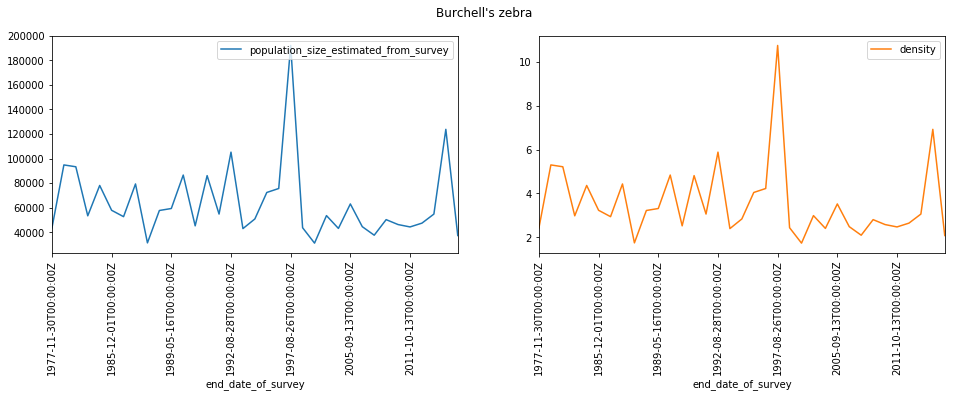

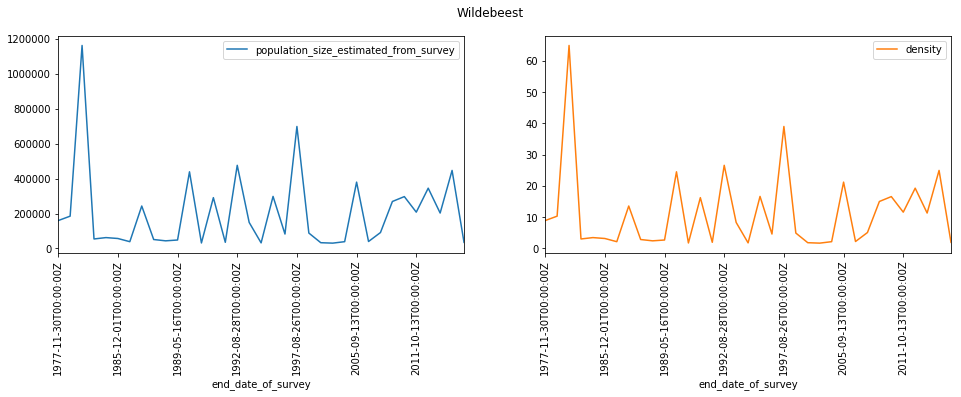

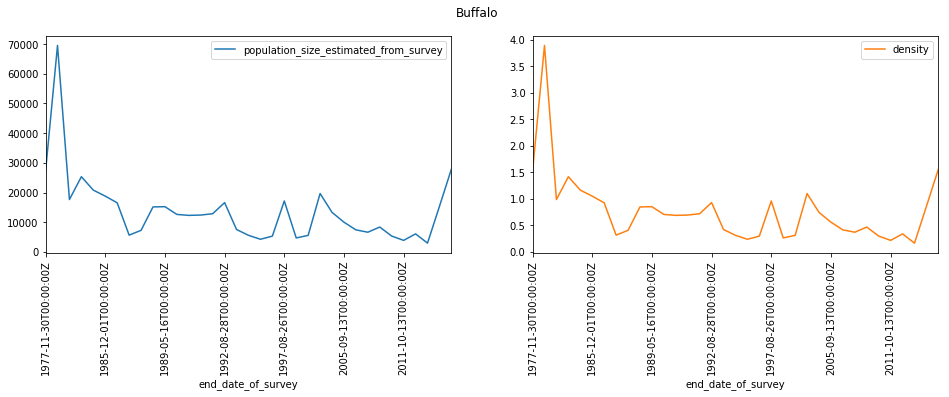

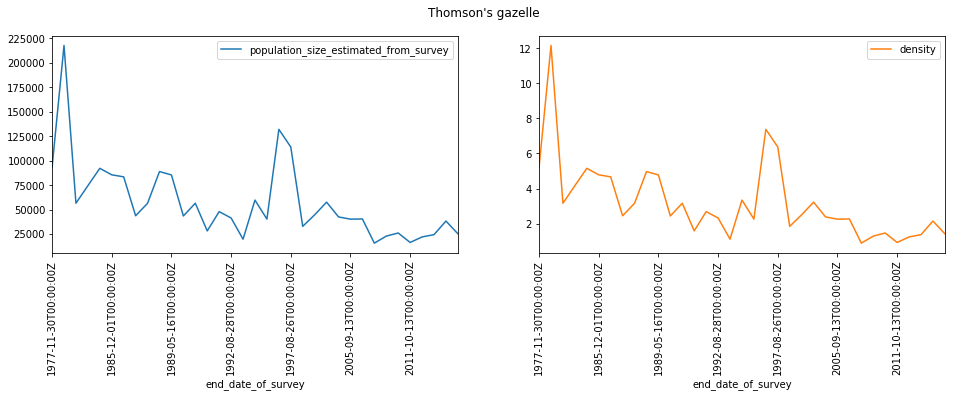

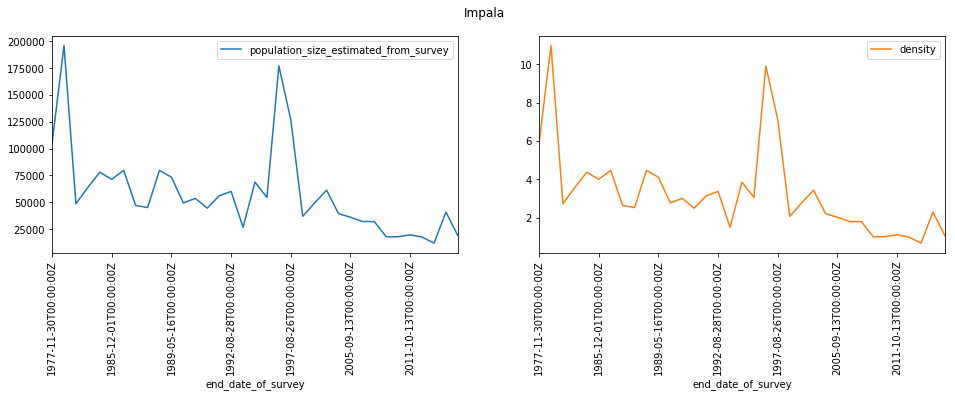

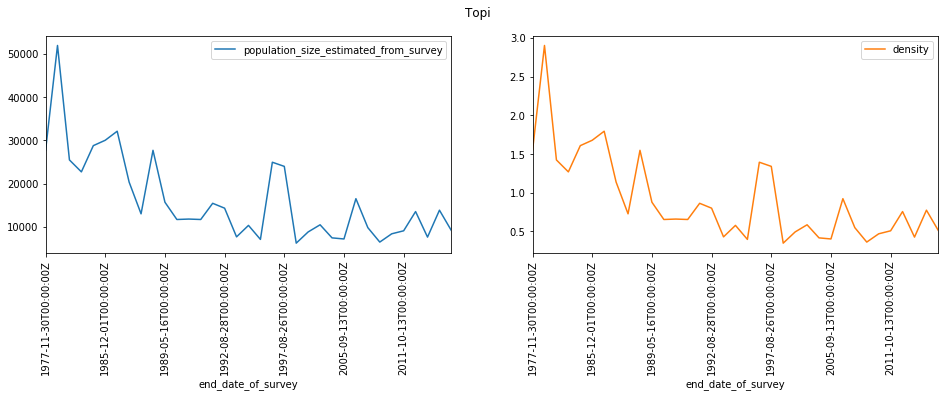

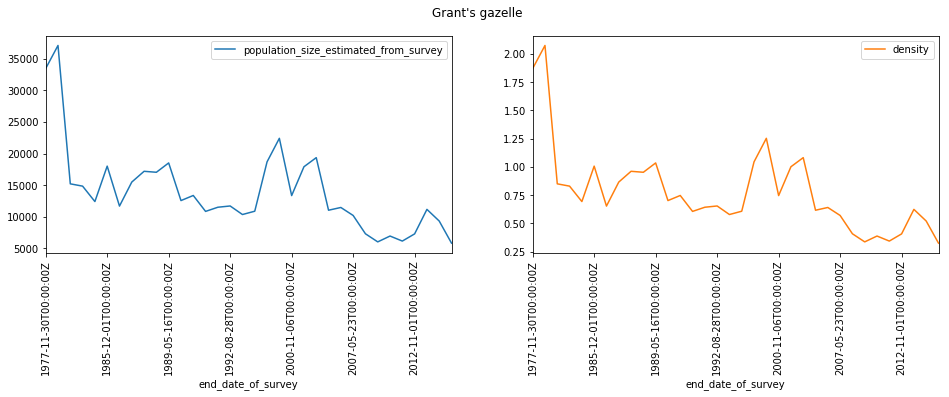

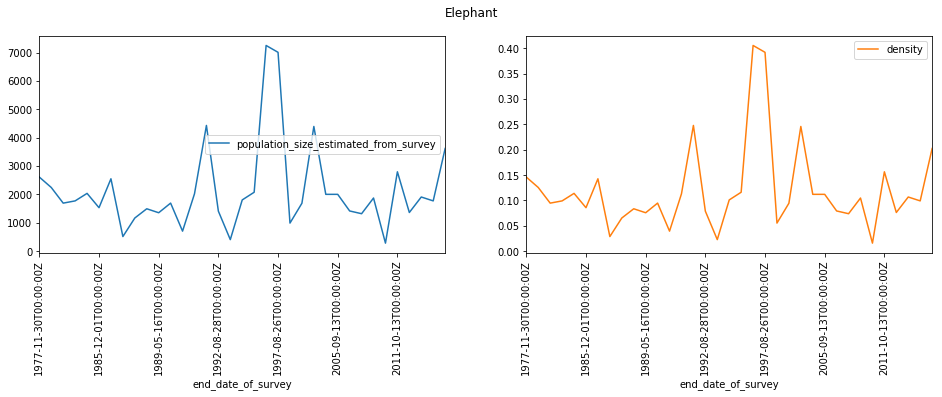

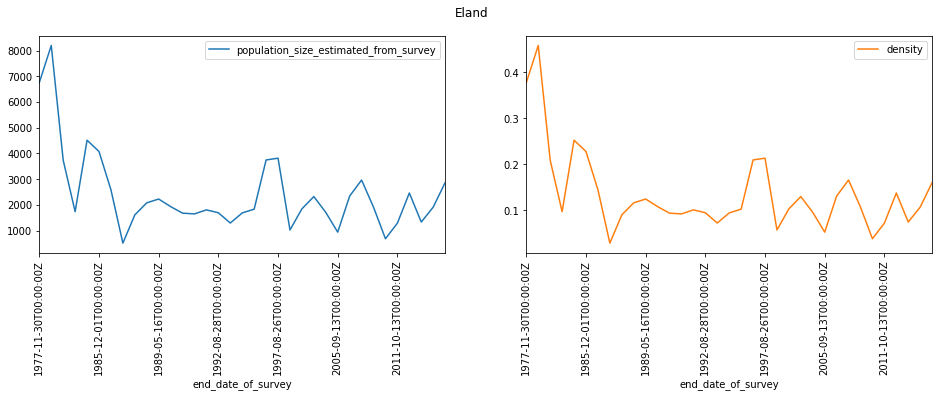

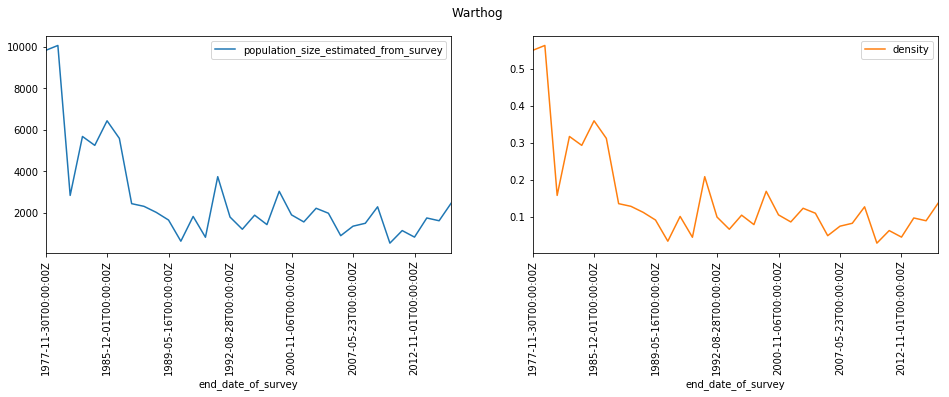

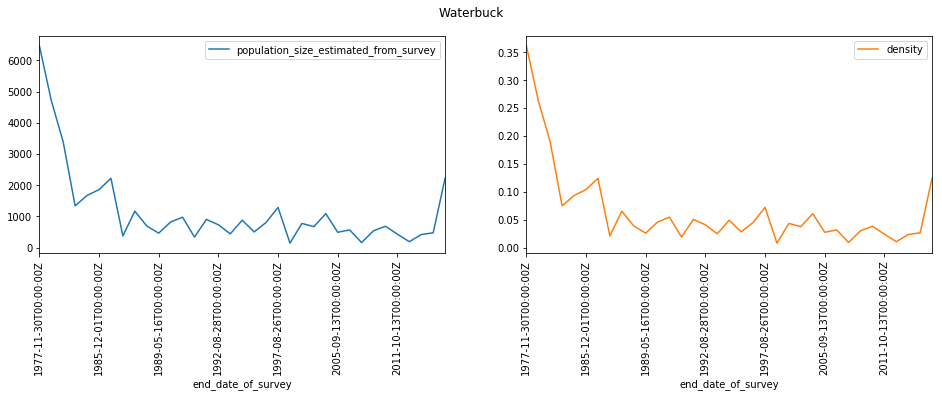

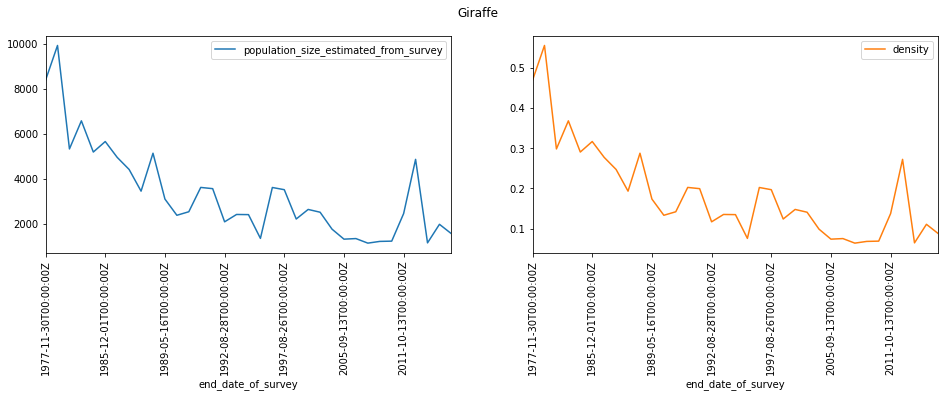

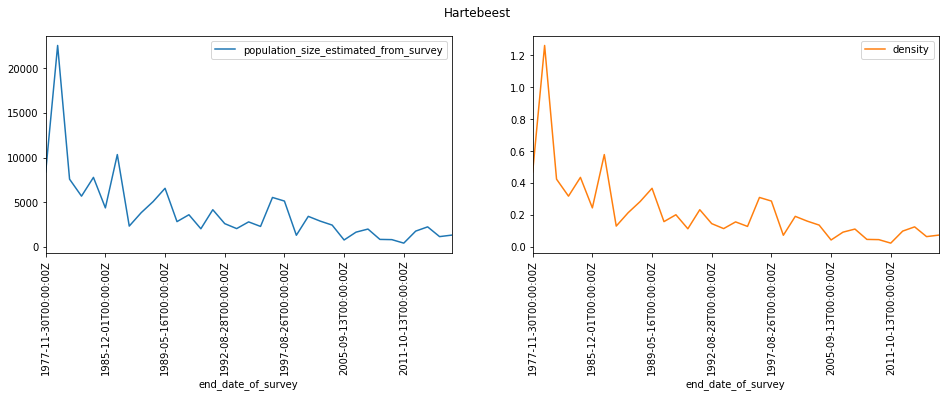

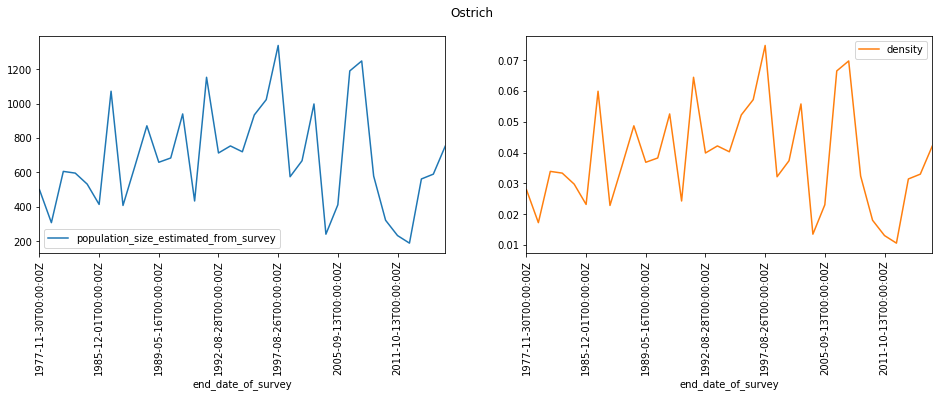

In [17]:
for specie in species:
    mask = (data["species"] == specie) & (data["population_size_estimated_from_survey"] > 0)
    display(data.loc[mask, ["end_date_of_survey","population_size_estimated_from_survey", "density"]].sort_values('end_date_of_survey').plot(x='end_date_of_survey',layout=(1, 2), sharex=False,rot=90,title=specie,subplots=True,figsize=(16, 4)));

### Agregated numbers

In [18]:
data = get_api_call("select * from indicators_wildlife_by_county where county_id = 'Narok' order by date asc")
print(data.shape)
data.head(2)

(9, 14)


,area_ha,cartodb_id,category,country_id,county_id,date,field_10,field_11,id,pa_id,the_geom,the_geom_webmercator,value,waterb_id
0,1788218,37,Wildlife Tropical Livestock Unit Densities,Kenya,Narok,1978,,,37,NA,NaN,NaN,26202.78,NA
1,1788218,38,Wildlife Tropical Livestock Unit Densities,Kenya,Narok,1986,,,38,NA,NaN,NaN,8011.93,NA


In [19]:
data.category.unique()

array(['Wildlife Tropical Livestock Unit Densities'], dtype=object)

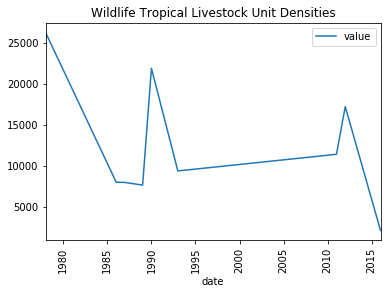

In [20]:
display(data.sort_values('date').plot(x='date', y='value',rot=90,title=data.category.unique()[0]));

## Livestock Numbers

### disagregated Populations

In [24]:
data = get_api_call("select end_date_of_survey, species, population_size_estimated_from_survey, population_size_estimated_from_survey/17882.18 as density from drsrs_county_summaries_ogutu_etal_2 where county = 'Narok' and species in ('Sheep and goats', 'Donkey', 'Cattle') order by end_date_of_survey desc, population_size_estimated_from_survey desc")
data[["end_date_of_survey","species","population_size_estimated_from_survey", "density"]].head(3)

,end_date_of_survey,species,population_size_estimated_from_survey,density
0,2016-01-16T00:00:00Z,Sheep and goats,1037559,58.021953
1,2016-01-16T00:00:00Z,Cattle,503476,28.155180
2,2016-01-16T00:00:00Z,Donkey,9700,0.542439


In [25]:
species = data.species.unique()
print(species)

['Sheep and goats' 'Cattle' 'Donkey']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121fffa90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122001828>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ee99e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12211a278>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121ff34e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12294e198>]], dtype=object)

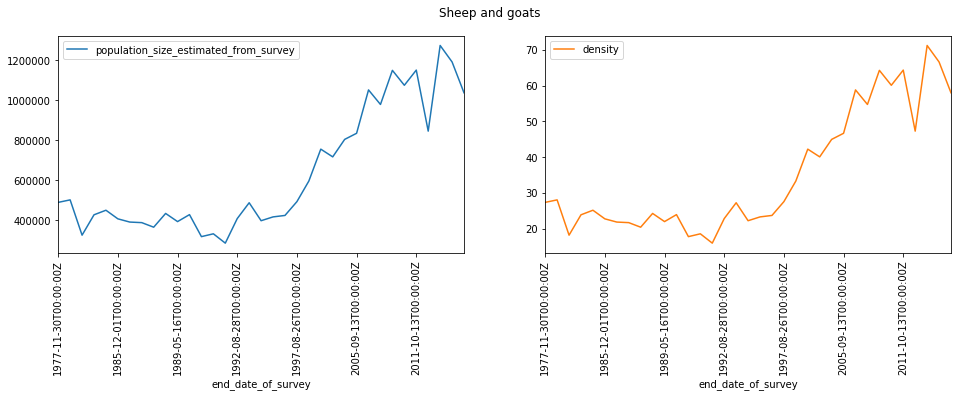

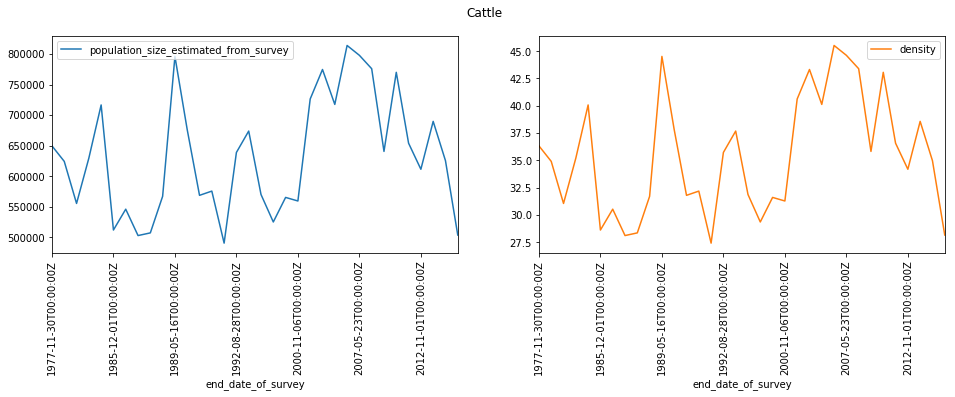

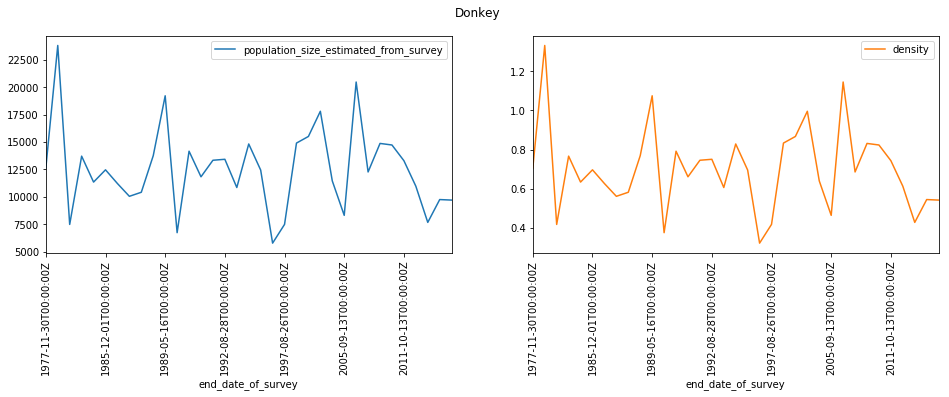

In [26]:
for specie in species:
    mask = (data["species"] == specie) & (data["population_size_estimated_from_survey"] > 0)
    display(data.loc[mask, ["end_date_of_survey","population_size_estimated_from_survey", "density"]].sort_values('end_date_of_survey').plot(x='end_date_of_survey',layout=(1, 2), sharex=False,rot=90,title=specie,subplots=True,figsize=(16, 4)));

### Agregated numbers

In [49]:
data = get_api_call("select * from indicators_livestock_by_county where county_id = 'Narok' order by date asc")
print(data.shape)
data.head(2)

(9, 14)


,area_ha,cartodb_id,category,country_id,county_id,date,field_10,field_11,id,pa_id,the_geom,the_geom_webmercator,value,waterb_id
0,1788218,37,Wildlife Tropical Livestock Unit Densities,Kenya,Narok,1978,,,37,NA,NaN,NaN,26202.78,NA
1,1788218,38,Wildlife Tropical Livestock Unit Densities,Kenya,Narok,1986,,,38,NA,NaN,NaN,8011.93,NA


In [36]:
data.category.unique()

array(['Wildlife Tropical Livestock Unit Densities', ''], dtype=object)

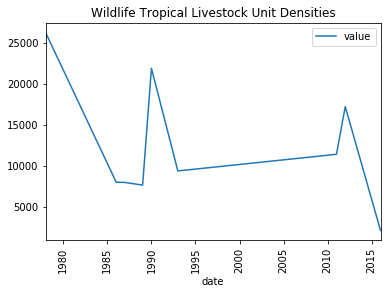

In [41]:
display(data.sort_values('date').plot(x='date', y='value',rot=90,title=data.category.unique()[0]));

## forest Cover

**Data Treatment:** we will convert it into a single table that will hold the next structure:

|geometry(polygons)|species|observation_year|density (count/sqkm)|  
|------------------|-------|----------------|--------------------|  
|||||  


If the density units are the same (units/sqkm) we can compare 1990 data)

In [ ]:
sizes= [20,10,30, 23,56]

#vissual
labels = 'Regulatory', 'Quality', 'Quantity','Regulatory', 'Quality'
theta = ('m', 'y', 'w')
explode = (0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.2f%%', colors=theta, shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

## Agriculture

In [ ]:
sizes= [76265.2110241221,4348.98735389614,231708.192116115,16246.7155458471,41108.7903833723,21317.1326835739,19475.0270593209,3779.03140711329,205851.776131946,492047.259349589]

#vissual
    labels = 'Scattered&Rainfedtreecrop','Rainfedtreecrop','Isolated','Scattered&Rainfedshrubcrop','Rainfedshrubcrop','Irrigatedherbaceouscrop','Forestplantationundifferentiated','Ricefields','Scattered&Rainfedherbaceouscrop','Rainfedherbaceouscrop'
    theta = ('m', 'y', 'w')
    explode = (0, 0, 0, 0)
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes,  labels=labels, autopct='%1.2f%%', colors=theta, shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

## Key protected ecosystems

**Data Treatment:** we will convert it into a single table that will hold the next structure:

|geometry(polygons)|species|observation_year|density (count/sqkm)|  
|------------------|-------|----------------|--------------------|  
|||||  


If the density units are the same (units/sqkm) we can compare 1990 data)

## climate

**Data Treatment:** we will convert it into a single table that will hold the next structure:

|geometry(polygons)|species|observation_year|density (count/sqkm)|  
|------------------|-------|----------------|--------------------|  
|||||  


If the density units are the same (units/sqkm) we can compare 1990 data)

In [ ]:
fil=pd.read_csv(basepath+'/data/keniaDashboard/Data/indicators_climate.csv')
fil.head()

In [ ]:
fil.category.unique()

## Key protected ecosystems

**Data Treatment:** we will convert it into a single table that will hold the next structure:

|geometry(polygons)|species|observation_year|density (count/sqkm)|  
|------------------|-------|----------------|--------------------|  
|||||  


If the density units are the same (units/sqkm) we can compare 1990 data)

## Key protected ecosystems

**Data Treatment:** we will convert it into a single table that will hold the next structure:

|geometry(polygons)|species|observation_year|density (count/sqkm)|  
|------------------|-------|----------------|--------------------|  
|||||  


If the density units are the same (units/sqkm) we can compare 1990 data)

### Data exploration

We have two main sources in the data shared

|property|value|
|----|-------|
|agency||
|temporal range||
|frequency||

### Configuration files to merge

The config file json configuration is a list of jsons where each json represents a file to be manage. The structure is reflected on the next example:
```json
{
"path": "<valid geojson endpoint>",
"specie":"<valid species name>",
"year":1990,
"data": None, ## empty as the geodataframe will be stored here
"columns":[], ## empty array
"columns_selection":["new_name1","new_name2"],
"columns_selec_rename": {
     "new_name1":"old_name1", 
     "new_name2":"old_name2"
    }
}

```

In [ ]:
pathD=basepath+'/data/keniaDashboard/Data/Wildlife'
filenames = [{"path": os.path.join(pathD,fn), "specie":fn.split('.')[0].replace('_numbers_','_').split('_')[1], "year":(fn.split('.')[0].replace('_numbers_','_')+'_1990').split('_')[2].rstrip('s')} for fn in next(os.walk(pathD))[2] if fn.endswith(".shp")]
print(filenames)

In [ ]:
for files in filenames:
    files['data']=gpd.read_file(files['path'])
    files['columns']=files['data'].columns.values
    print(files['data'].head())

In [ ]:
for files in filenames:
    display(Markdown("{0} density in {1}: **{2}**, total population: {3}".format(files['specie'],files['year'], files['data'].mean().values[0], files['data'].sum().values[0])))
            
print('are we talking about density? it seems that species density is more like number of individuals per grid')